In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!pwd

/Users/jfl/Desktop/B2-Analisis-de-Datos-con-Python-2020-master


In [3]:
all_data = pd.read_csv('Datasets/all_data_proyecto.csv')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [4]:
#limpieza de datos, buscando NANs
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#quitando NANs
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [6]:
#buscando Ors
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [7]:
#agrego una columna de "month" basado en Order Date, tomando los primeros 2 digitos del formato mm/dd/aa
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [8]:
#hay que limpiar mas la informacion
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [9]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # para convertir objetos en numeros
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [10]:
# ahora puedo comenzar a analizar la informacion
# cual fue el mejor mes de ventas? y por cuanto
# pero no hay columna de ventas, asi que hay que crear una columna
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [11]:
# para saber cual es el mes con mayores ventas, agrupamos
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [12]:
results = all_data.groupby('Month').sum()
results.sort_values('Sales')

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
9,13109,2.084992e+06,2.097560e+06
2,13449,2.188885e+06,2.202022e+06
8,13448,2.230345e+06,2.244468e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
3,17005,2.791208e+06,2.807100e+06
5,18667,3.135125e+06,3.152607e+06
11,19798,3.180601e+06,3.199603e+06


In [13]:
# cual es la ciudad con mayores ventas?
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [14]:
#no hay ciudad, sino una direccion de compra, hay que crear una columna que sea la ciudad con .apply
all_data['Column'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

In [15]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

In [16]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x)+ ')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,Atlanta (GA)


In [17]:
#columna para 'City' agregada
results = all_data.groupby('City').sum()
results.sort_values('Quantity Ordered')

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
Seattle (WA),16553,2.733296e+06,104941,2.747755e+06
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06


In [18]:
# que producto se vendio mas?
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,Atlanta (GA)


In [19]:
products = all_data.groupby('Product').sum()
products.sort_values('Quantity Ordered')

,Quantity Ordered,Price Each,Month,Sales
Product,,,,
LG Dryer,646,387600.00,4383,387600.00
LG Washing Machine,666,399600.00,4523,399600.00
Vareebadd Phone,2068,826000.00,14309,827200.00
20in Monitor,4129,451068.99,29336,454148.71
ThinkPad Laptop,4130,4127958.72,28950,4129958.70
Macbook Pro Laptop,4728,8030800.00,33548,8037600.00
Flatscreen TV,4819,1440000.00,34224,1445700.00
Google Phone,5532,3315000.00,38305,3319200.00
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01


In [20]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,Atlanta (GA)


In [21]:
#calculanco media de los precios
all_data['Price Each'].mean()

184.399734767007

In [22]:
#calculanco mediana de los precios
all_data['Price Each'].median()

14.95

In [23]:
#calculando rango en los precios
all_data['Price Each'].max() - all_data['Price Each'].min()

1697.01

In [24]:
all_data['Price Each'].max()

1700.0

In [25]:
#esto solo fue una verificacion
all_data['Price Each'].min() 

2.99

In [26]:
#calculando percentil
all_data['Price Each'].quantile(0.8)

300.0

In [27]:
#calculando percentil
print(f'En este caso, el 80% de los valores en nuestro conjunto de datos tienen un valor menor o igual a: {all_data["Price Each"].quantile(0.8)}')

En este caso, el 80% de los valores en nuestro conjunto de datos tienen un valor menor o igual a: 300.0


In [28]:
print(f'Valor mínimo: {all_data["Price Each"].min()}')
print(f'Percentil 10: {all_data["Price Each"].quantile(0.1)}')
print(f'Percentil 25: {all_data["Price Each"].quantile(0.25)}')
print(f'Percentil 50: {all_data["Price Each"].median()}')
print(f'Percentil 75: {all_data["Price Each"].quantile(0.75)}')
print(f'Percentil 90: {all_data["Price Each"].quantile(0.9)}')
print(f'Valor máximo: {all_data["Price Each"].max()}')

Valor mínimo: 2.99
Percentil 10: 2.99
Percentil 25: 11.95
Percentil 50: 14.95
Percentil 75: 150.0
Percentil 90: 600.0
Valor máximo: 1700.0


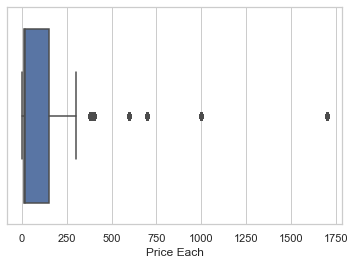

In [29]:
sns.set(style="whitegrid")
sns.boxplot(x=all_data['Price Each']);

In [30]:
#la mayoria de los precios estan por debajo de los 250, cualquier precio por encima, se considera anomalia

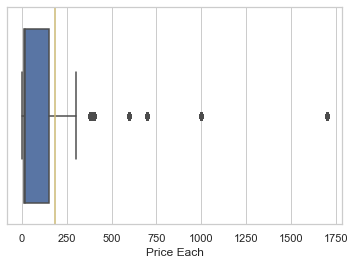

In [31]:
#a la misma grafica se agrega la media
sns.set(style="whitegrid")
sns.boxplot(x=all_data['Price Each'])
plt.axvline(all_data['Price Each'].mean(), c='y');

In [32]:
#IQR-Score (R.Intercuartilico), limitando los "bigotes" y filtrar los datos que exceden ese limite
iqr = all_data['Price Each'].quantile(0.75) - all_data['Price Each'].quantile(0.25)
f_inferior = all_data['Price Each'] > all_data['Price Each'].quantile(0.25) - (iqr * 1.5)
f_superior = all_data['Price Each'] < all_data['Price Each'].quantile(0.75) + (iqr * 1.5)

df_filtrado = all_data[f_inferior & f_superior]

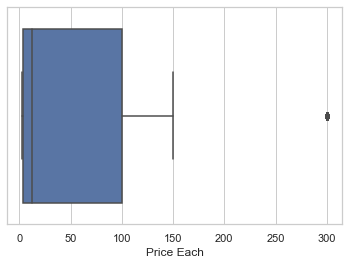

In [33]:
#para obtener un conjunto de valores sin valores atipicos
sns.boxplot(x=df_filtrado['Price Each']);

/Users/jfl/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


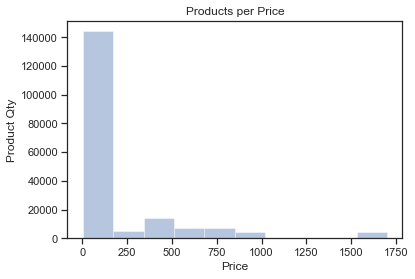

In [38]:
#histograma
sns.set(style='ticks')
histo = sns.distplot(x=all_data['Price Each'], kde=False, norm_hist=False, bins=10)
histo.set(title='Products per Price', xlabel='Price', ylabel='Product Qty');
#con el histograma se puede apreciar la tendencia de los precios de los productos

In [35]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,Atlanta (GA)


In [36]:
#para determinar el numero de productos por cantidad
counts = all_data['Product'].value_counts()

In [37]:
counts

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [38]:
qty = all_data['Product'].value_counts()

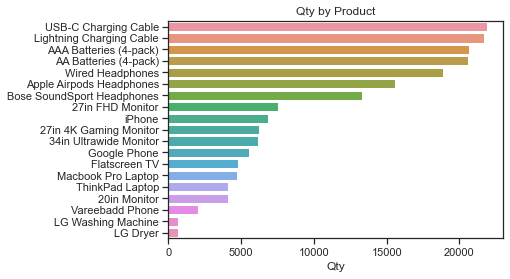

In [39]:
bar = sns.barplot(x=qty , y=counts.index, orient='h')
bar.set_title('Qty by Product')
bar.set(xlabel='Qty');

In [40]:
#determinar la cantidad de productos vendidos en cada ciudad
crosstab = pd.crosstab(all_data['Product'], all_data['City'])
crosstab

City,Atlanta (GA),Austin (TX),Boston (MA),Dallas (TX),Los Angeles (CA),New York City (NY),Portland (ME),Portland (OR),San Francisco (CA),Seattle (WA)
Product,,,,,,,,,,
20in Monitor,338,228,394,340,654,555,59,218,993,322
27in 4K Gaming Monitor,492,318,673,479,1003,840,85,348,1456,536
27in FHD Monitor,584,356,793,580,1217,1069,114,414,1803,577
34in Ultrawide Monitor,478,328,669,511,953,865,76,326,1442,533
AA Batteries (4-pack),1661,1071,2215,1693,3289,2675,293,1144,4903,1633
AAA Batteries (4-pack),1598,1091,2301,1650,3313,2773,237,1122,4932,1624
Apple Airpods Headphones,1263,882,1642,1187,2452,2079,228,861,3705,1250
Bose SoundSport Headphones,1077,694,1402,1055,2099,1771,178,705,3287,1057
Flatscreen TV,405,242,551,419,724,625,62,249,1149,374


In [41]:
#matriz de correlacion
all_data.corr()

,Quantity Ordered,Price Each,Month,Sales
Quantity Ordered,1.000000,-0.148272,0.000791,-0.139417
Price Each,-0.148272,1.000000,-0.003375,0.999203
Month,0.000791,-0.003375,1.000000,-0.003466
Sales,-0.139417,0.999203,-0.003466,1.000000


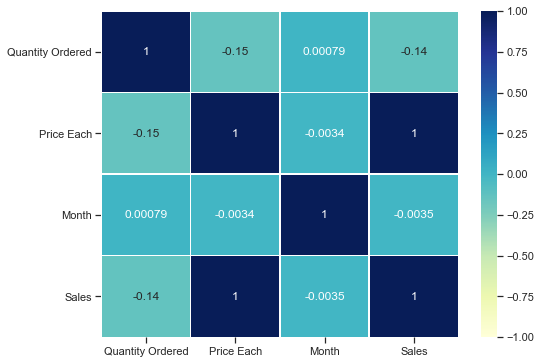

In [42]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(all_data.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

In [56]:
#grafica de dispersion
#sns.scatterplot(x=all_data['Quantity Ordered'], y=all_data['Product']);

In [57]:
#sns.scatterplot(x=all_data['Month'], y=all_data['Sales']);

In [50]:
#patrones regex
import re

In [51]:
#agrupo por producto
grouped_product = all_data.groupby('Product')['Product'].max()
grouped_product

Product
20in Monitor                                20in Monitor
27in 4K Gaming Monitor            27in 4K Gaming Monitor
27in FHD Monitor                        27in FHD Monitor
34in Ultrawide Monitor            34in Ultrawide Monitor
AA Batteries (4-pack)              AA Batteries (4-pack)
AAA Batteries (4-pack)            AAA Batteries (4-pack)
Apple Airpods Headphones        Apple Airpods Headphones
Bose SoundSport Headphones    Bose SoundSport Headphones
Flatscreen TV                              Flatscreen TV
Google Phone                                Google Phone
LG Dryer                                        LG Dryer
LG Washing Machine                    LG Washing Machine
Lightning Charging Cable        Lightning Charging Cable
Macbook Pro Laptop                    Macbook Pro Laptop
ThinkPad Laptop                          ThinkPad Laptop
USB-C Charging Cable                USB-C Charging Cable
Vareebadd Phone                          Vareebadd Phone
Wired Headphones       

In [50]:
#productos que contienen 'phone'
grouped_product[grouped_product.str.contains('phone', case=False)]

Product
Apple Airpods Headphones        Apple Airpods Headphones
Bose SoundSport Headphones    Bose SoundSport Headphones
Google Phone                                Google Phone
Vareebadd Phone                          Vareebadd Phone
Wired Headphones                        Wired Headphones
iPhone                                            iPhone
Name: Product, dtype: object

In [51]:
#productos que contienen 'laptop'
grouped_product[grouped_product.str.contains('laptop', case=False)]

Product
Macbook Pro Laptop    Macbook Pro Laptop
ThinkPad Laptop          ThinkPad Laptop
Name: Product, dtype: object

In [52]:
#productos que contienen numeros
grouped_product[grouped_product.str.contains('[0-9]')]

Product
20in Monitor                        20in Monitor
27in 4K Gaming Monitor    27in 4K Gaming Monitor
27in FHD Monitor                27in FHD Monitor
34in Ultrawide Monitor    34in Ultrawide Monitor
AA Batteries (4-pack)      AA Batteries (4-pack)
AAA Batteries (4-pack)    AAA Batteries (4-pack)
Name: Product, dtype: object

In [54]:
nltk.download('punkt')
nltk.download('stopwords')

NameError: name 'nltk' is not defined

In [55]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nltk.util import ngrams

In [56]:
#nlp visualizaciones
all_data['Product'].unique()

array(['Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
       '27in FHD Monitor', 'AA Batteries (4-pack)',
       'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
       'ThinkPad Laptop', 'Lightning Charging Cable', 'Google Phone',
       'Wired Headphones', 'Apple Airpods Headphones', 'Vareebadd Phone',
       'iPhone', '20in Monitor', '34in Ultrawide Monitor',
       'Flatscreen TV', '27in 4K Gaming Monitor', 'LG Dryer'],
      dtype=object)

In [57]:
grouped_by_title = all_data.groupby('Product')['Product'].max() #no es necesario hacer la agrupacion
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
grouped_by_title = grouped_by_title.str.replace('\d', '')
grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title = grouped_by_title.dropna()



<ipython-input-57-c531ee8f503a>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
<ipython-input-57-c531ee8f503a>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('\d', '')
<ipython-input-57-c531ee8f503a>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('\\n', '')


In [58]:
tokenized = grouped_by_title.apply(nltk.word_tokenize)
tokenized.head()

Product
20in Monitor                         [in, monitor]
27in 4K Gaming Monitor    [in, k, gaming, monitor]
27in FHD Monitor                [in, fhd, monitor]
34in Ultrawide Monitor    [in, ultrawide, monitor]
AA Batteries (4-pack)        [aa, batteries, pack]
Name: Product, dtype: object

In [62]:
all_words = tokenized.sum()

In [63]:
english_stop_words = stopwords.words('english')
all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

freq_dist = nltk.FreqDist(all_words_except_stop_words)

In [ ]:
!conda install -c conda-forge wordcloud

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/jfl/opt/anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.1               |   py38h50d1736_0         3.1 MB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    wordcloud-1.8.1            |   py38h5406a74_1         170 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/osx-64::python_abi-3.8-1_cp38
  wordcloud          conda-forge/osx-64::wordcloud-1.8.1-py

In [ ]:
y

In [ ]:
from wordcloud import WordCloud

In [ ]:
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()